# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## Goal

In this assignment, you will be asked to find insights from the data by using **pandas** to analyze and manipulate the data and **matplotlib** and **seaborn** for data visualization. You will get a bonus point if you can apply a logistic regression model to predict which passengers are more likely to survive in a separate test set. 

In [2]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# load data
titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of the data set
Here's a brief description of each column in the data.

- PassengerID: A column added by Kaggle to identify each row and make submissions easier
- Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass: The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex: The passenger's sex
- Age: The passenger's age in years
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic
- Parch: The number of parents or children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [4]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### **Question 1: Find the number of missing values for each column.**
The first step in data analysis is to identify columns with missing data. Can you find the columns in this data with missing value as well as the number of records with missing value for each column?  

Hint: you will need [isna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isna.html) function.

In [5]:
# TODO
titanic.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [6]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### **Question 2: Impute missing values.**
Now we've identified the following columns with missing values: _Age_, _Cabin_ and _Embarked_. As the next step, we want to impute those missing values. There are three ways to impute the missing values:
- A constant value that has meaning within the domain.
- The mean, median or mode value based on non-missing values of that column.
- A random value drawn from other non-missing values of that column.

Please write code to impute the missing values as follows:
- the missing values of column _age_ with the mean of that column.
- the missing values of column _Cabin_ with a constant value 'other'.
- the missing values of column _Embarked_ with the [mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html) of that column.

In [7]:
# TODO
titanic['Age'].fillna(value=titanic['Age'].mean(),inplace=True)
titanic['Cabin'].fillna(value='other',inplace=True)
titanic['Embarked'].fillna(value=titanic['Embarked'].mode,inplace=True)

In [8]:
titanic['Embarked'].mode()

0    S
dtype: object

In [9]:
titanic.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

### **Question 3: What's the name of the person who has the 16th most expensive ticket?**

In [10]:
# TODO
expensive_ticket=titanic.sort_values('Fare',ascending=False)
expensive_ticket.iloc[15]['Name']

'Farthing, Mr. John'

### **Question 4: Out of all the remales who survived, what's the name who has the 6th most expensive ticket?**

In [11]:
# TODO
female_survived= titanic[(titanic['Sex']=='female') & titanic['Survived']==1]
female_survived.sort_values('Fare',ascending=False).iloc[5]['Name']


'Baxter, Mrs. James (Helene DeLaudeniere Chaput)'

### **Question 5: Examine the survival rate**
Calculate the survival rate for different gender and Pclass combination and use a couple of sentences to describe your findings. Hint: pivot_table is your friend.

In [12]:
# TODO
pd.pivot_table(titanic,index=['Sex','Pclass'],values='Survived')

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

* The survival rate of passengers decreased as the order of Pclass decreased.
For both the genders(male and female), passengers in Pclass 1 had a higher chance of survival followed by Pclass 2 and then Pclass 3.

* In all the 3 Pclass the survival rate of female passengers was higher than that of male passengers


### **Question 6: Is Age or Fare an important factor to one's chance of survival?**
Visualize the distribution of Column _Age_ for both survived and non-survived population and write down your findings based on the visualization.

In [15]:
titanic['Fare'] = pd.to_numeric(titanic['Fare'] , errors='coerce')
pd.to_numeric(titanic['Fare'], errors='coerce').convert_dtypes() 

0         7.25
1      71.2833
2        7.925
3         53.1
4         8.05
        ...   
886       13.0
887       30.0
888      23.45
889       30.0
890       7.75
Name: Fare, Length: 891, dtype: Float64

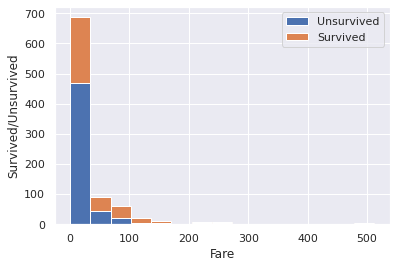

In [16]:
# TODO
plt.hist([titanic[titanic['Survived']==0]['Fare'],titanic[titanic['Survived']==1]['Fare']],stacked=True, bins=15,label=['Unsurvived','Survived'])
plt.xlabel('Fare')
plt.ylabel('Survived/Unsurvived')
plt.legend()
plt.show()

We can see that passengers who have paid a higher fare has a higher probability of survival, this can be related to Question 5 where we found that passengers in Pclass 1 had a higher survival rate. So fare can be correlated to passenger class and thus the higher/lower survival rate.

**higher fare -> first class -> higher chance of survival**

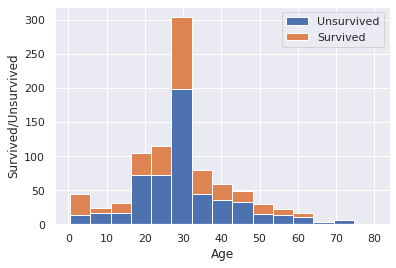

In [17]:
plt.hist([titanic[titanic.loc[:,'Survived']==0]['Age'],titanic[titanic.loc[:,'Survived']==1]['Age']],bins=15,stacked=True,label=['Unsurvived','Survived'])
plt.xlabel('Age')
plt.ylabel('Survived/Unsurvived')
plt.legend()
plt.show()

There is no clear distinction with respect to age,but we can see that passengers in the age range of 20-30's and >60's have a lesser chance of survival whereas **children in the age range of 0-10 had a higher chance of survival**.

- Out of the 2 factors Age and Fare - Fare seems to be a better predictor for survival


### **Question 7: Calculate and visualize the survival rate for discrete columns**
- Calculate the survival rate for column _SibSp_ and _Parch_.
- Use sns.barplot to visualize the survival rate for column _SibSp_ and _Parch_.

In [18]:
# TODO - survival rate for SibSP
titanic.groupby('SibSp')['Survived'].mean()


SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

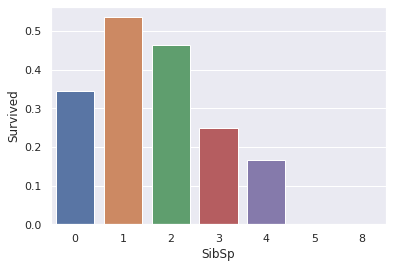

In [9]:
sns.barplot(data=titanic, x="SibSp", y="Survived",ci=None)

It can be inferred that passengers travelling with one or two family members(siblings/spouse) have a higher chanve of survival

In [19]:
#survival rate for Parch
titanic.groupby('Parch')['Survived'].mean()


Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

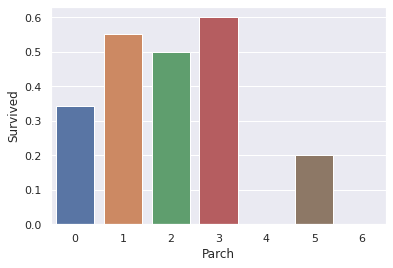

In [10]:
sns.barplot(data=titanic, x="Parch", y="Survived",ci=None)

Similar to SibSp, we can see that passengers travelling with one,two or three parents/children have a higher chance of survival.

### **Question 8: Find the correlations.**
Find the correlations between the feature and the target variable _Survived_ and use heatmap to visualize it. Summarize your findings.

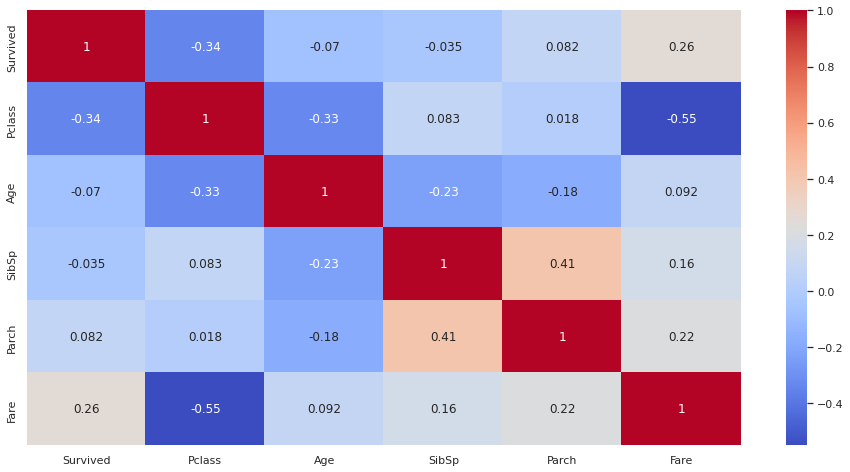

In [20]:
# TODO
titanic_cor = titanic[['Survived','Pclass','Age','SibSp','Parch','Fare']].corr()
	
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(titanic_cor, annot = True, fmt='.2g',cmap= 'coolwarm')

-Fare has the highest correlation cooefficient(fare is positvely correlated with Survival). This strengthens our inference from Question 6 that if a passenger has paid a higher fare, they have a higher chance of survival.

### **Question 9: Any other insights do you draw by analyzing the data? Summarize the findings as well as provide the code leading you to the findings.**

There is one other feature we haven't explored yet 'Embarked'. 
We will try to find the relationship between port of Embarkment and Survival rate.

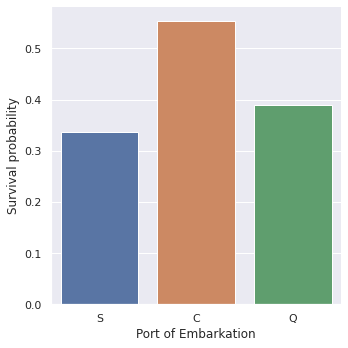

In [ ]:
# TODO
g=sns.catplot(x='Embarked',y='Survived',data=titanic,kind='bar',ci=None)
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival probability')
plt.show(g)


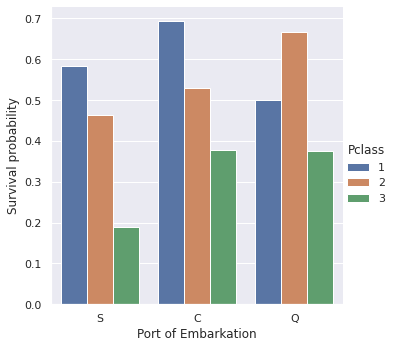

In [ ]:
g2=sns.catplot(x='Embarked',y='Survived',hue='Pclass',data=titanic,kind='bar',ci=None)
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival probability')
plt.show(g2)


- Passengers from cherbourg had a higher survival rate compared to other two ports. This can again, be tied to the fact that majority of the passengers from cherbourg had a Pclass 1 ticket thus having a greater chance of survival.

**Final thoughts **- From the above analysis, we can conclude that passengers who had a higher chance of survival were

* those who paid a higher fare and had a first class ticket.
* female passengers
* children under the age of 10
* passengers who embarked from cherbourg

### **Bonus Point: Build a ML model to predict survival.**
Can you build a logistic regression model to predict the probability of survival for all the passengers in this [file](https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv)? You can evaluate your model accuracy on [Kaggle](https://www.kaggle.com/c/titanic). Can you think of any other ways to improve the model performance? Implement your idea to see if it actually works. 

In [40]:
# TODO
# load test data
titanic_reg = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv')
display(titanic_reg.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
#Find columns with missing values
titanic_reg.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
#Impute missing values
titanic_reg['Age'].fillna(value=titanic_reg['Age'].mean(),inplace=True)
titanic_reg['Fare'].fillna(value=titanic_reg['Fare'].mode,inplace=True)
titanic_reg.drop('Cabin',axis=1,inplace=True)

In [9]:
#Categorize age column
bins=[0,5,16,25,45,65,95]
labels=['infant','kid','young','adult','old','elderly']
titanic_reg['Age']=pd.cut(titanic_reg['Age'],bins=bins,labels=labels)

In [10]:
#Converting type object to int for column 'Fare'
titanic_reg['Fare'] = pd.to_numeric(titanic_reg['Fare'] , errors='coerce')
pd.to_numeric(titanic_reg['Fare'], errors='coerce').convert_dtypes() 

0       7.8292
1          7.0
2       9.6875
3       8.6625
4      12.2875
        ...   
413       8.05
414      108.9
415       7.25
416       8.05
417    22.3583
Name: Fare, Length: 418, dtype: Float64

In [11]:
#Categorize Fare column
bins_q=[7.8,14.45,31.0,512.32]
labels_q=['low','medium','high']
titanic_reg['Fare']=pd.cut(titanic_reg['Fare'],bins=bins_q,labels=labels_q)

In [12]:
#convert categorical data to numeric values
from sklearn.preprocessing import LabelEncoder
el=LabelEncoder()
titanic_reg['age_new'] = el.fit_transform(titanic_reg['Age'])
titanic_reg['gender'] = el.fit_transform(titanic_reg['Sex'])
titanic_reg['Embarked_num'] = el.fit_transform(titanic_reg['Embarked'])
titanic_reg['fare_new'] = el.fit_transform(titanic_reg['Fare'])

In [13]:
#Target variable
titanic_reg['Survived']=0

In [14]:
#Drop unwanted and categorical columns
titanic_reg.drop(['PassengerId','Name','Sex','Age','Ticket','Fare','Embarked'],axis=1,inplace=True)

In [15]:
#Split test data
X_test = titanic_reg.drop('Survived', axis = 1)
y_test = titanic_reg['Survived']

In [23]:
#load training data
titanic_train= titanic.copy()
titanic_train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [24]:
##Converting type object to str for column 'Embarked'
titanic_train['Embarked'] = titanic_train['Embarked'].astype(str)

In [25]:
#Categorize age column
bins=[0,5,16,25,45,65,95]
labels=['infant','kid','young','adult','old','elderly']
titanic_train['Age']=pd.cut(titanic_train['Age'],bins=bins,labels=labels)

In [26]:
#Categorize Fare column
bins_q=[7.8,14.45,31.0,512.32]
labels_q=['low','medium','high']
titanic_train['Fare']=pd.cut(titanic_train['Fare'],bins=bins_q,labels=labels_q)

In [27]:
#Convert categorical data to numeric values
from sklearn.preprocessing import LabelEncoder
el=LabelEncoder()
titanic_train['age_new'] = el.fit_transform(titanic_train['Age'])
titanic_train['gender'] = el.fit_transform(titanic_train['Sex'])
titanic_train['Embarked_num'] = el.fit_transform(titanic_train['Embarked'])
titanic_train['fare_new'] = el.fit_transform(titanic_train['Fare'])

In [28]:
#Drop unwanted and categorical columns
titanic_train.drop(['PassengerId','Name','Sex','Age','Ticket','Fare','Embarked','Cabin'],axis=1,inplace=True)

In [29]:
#Importing required libraries to buid the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [30]:
titanic_train

,Survived,Pclass,SibSp,Parch,age_new,gender,Embarked_num,fare_new
0,0,3,1,0,5,1,3,3
1,1,1,1,0,0,0,1,0
2,1,3,0,0,0,0,3,1
3,1,1,1,0,0,0,3,0
4,0,3,0,0,0,1,3,1
...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,1,3,1
887,1,1,0,0,5,0,3,2
888,0,3,1,2,0,0,3,2
889,1,1,0,0,0,1,1,2


In [31]:
#Model building
X = titanic_train.drop('Survived', axis = 1)
y = titanic_train['Survived']
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [34]:
y_pred = log_reg.predict(X_test)

In [35]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [36]:
#Evaluating the accuracy of model in Kaggle- the file to be submitted must have PassengerId and the target variable Survived
#1) Convert the target variable column to a list
y_pred_list=y_pred.tolist()


In [46]:
#2) Create a dataframe with Passenger ID and target variable Survived
titanic_df=pd.DataFrame(titanic_reg['PassengerId'])
titanic_df['Survived']=y_pred_list
titanic_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
#Converting data frame to csv
from google.colab import files
titanic_df.to_csv('titanic.csv', encoding = 'utf-8-sig') 
files.download('titanic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

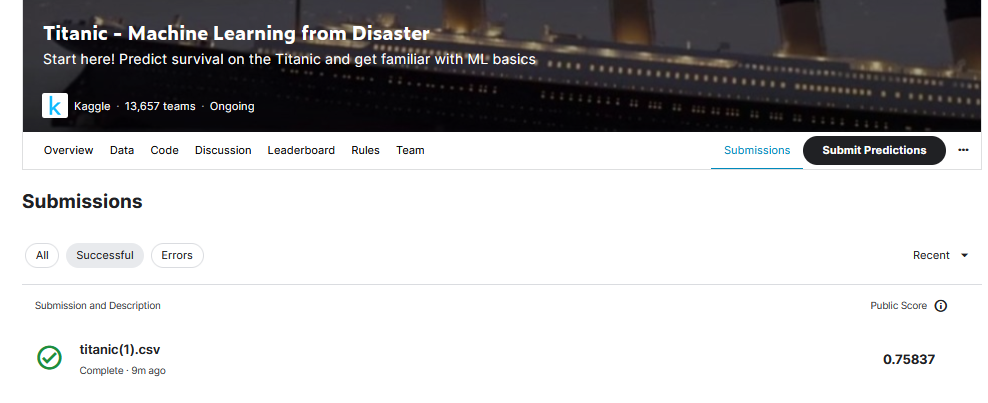

In [50]:
#Hyperparameter tuning to improve model performance
param_grid_lr = {
        'max_iter': [200,300,400,500,600,700,800],
    #'penalty': ['l1', 'l2', 'elasticnet', 'none'],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced'],     
    'C':np.logspace(-5,8,15)                           
}

In [51]:
#Import gridsearch
from sklearn.model_selection import GridSearchCV

logModel_grid = GridSearchCV(log_reg, param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)
logModel_grid.fit(X, y)
print(logModel_grid.best_estimator_)

Fitting 10 folds for each of 525 candidates, totalling 5250 fits
LogisticRegression(C=0.05179474679231213, class_weight='balanced', max_iter=200,
                   solver='liblinear')


In [52]:
y_pred = logModel_grid.predict(X_test)
print(y_pred)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [53]:
y_pred_list=y_pred.tolist()

titanic_df_2=pd.DataFrame(titanic_reg['PassengerId'])
titanic_df_2['Survived']=y_pred_list
titanic_df_2

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [49]:
from google.colab import files
titanic_df_2.to_csv('titanic_2.csv', encoding = 'utf-8-sig') 
files.download('titanic_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [54]:
print("Tuned Logistic Regression Parameters: {}".format(logModel_grid.best_params_))
print("Best score is {}".format(logModel_grid.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213, 'class_weight': 'balanced', 'max_iter': 200, 'solver': 'liblinear'}
Best score is 0.7856179775280898


By adjusting the parameters in hyperparameter modelling, we were able to improve the accuracy from 75% to 78%. 